# Clasificación de ingresos basado en Machine Learning. 

##### *Descripción:* Construir un modelo efectivo para predecir el nivel de ingresos de adultos basado en diferentes factores demográficos y socioeconómicos.


# **ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

### *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. **ANÁLISIS EXPLORATORIO DE DATOS (EDA)**
    - [1.1. Carga de datos](#11)
    - [1.2. Análisis visual](#12)
    - [1.3. Análisis estadístico](#13)   
2. MACHINE LEARNING
    - 2.1. Preparación y limpieza de datos
    - 2.2. Feature Engineering
    - 2.3. Modelado
3. RESULTADOS
    - 3.1. Visualización y reporting de los resultados
    - 3.2. Creación de un pipeline para el flujo automatizado
---


Los datos se encuentran en https://archive.ics.uci.edu/datasets?skip=0&take=10&sort=desc&orderBy=NumHits&search=Adult, en formato csv y se convierten a dataframe.




## 0. INTRODUCCIÓN:

El conjunto de datos proporciona información detallada sobre datos demográficos, educación, ocupación y otros atributos relacionados con individuos, lo que permite investigar y explorar la predicción de ingresos anuales basados en estas características.

El objetivo de este proyecto es construir un modelo efectivo para predecir los ingresos de un grupo de adultos basados en varias variables demográficas y socioeconómicas y desarrollar un modelo robusto a través de técnicas de machine learning que pueda clasificar de manera precisa a los individuos en diferentes categorías de ingresos. 

Background : Predecir el nivel de ingresos de un adulto es una tarea importante para varios objetivos: programas de bienestar social, estudios de mercado o económicos.Sin embargo, determinar los ingresos individuales basándonos solamente  en características demográficas o socioeconómicas, es un reto complejo en el que intervienen diferentes factores.

Dataset : El dataset utilizado para este proyecto consiste en información anonimada sobre adultos donde se incluyen características como ocupación , nivel de educación o estado civil. Cada individuo está categorizado en función de su nivel de ingresos superior o inferior a un limite ($50,000 año). Las variables observadas son: edad, clase trabajadora, Fnlwgt (ponderación) ,educación, estado civil, ocupación, relación, raza ,sexo , capital ganado, capital perdido, horas trabajadas por semana, país de origen y salario (target).
Este dataset podría ser utilizado en el futuro para estudiar los cambios Los cambios temporales a partir de nuevas secuencias de datos en el tiempo y también, eh, por variación geográfica.


Methodología: Nos vamos a centrar en comparar las métricas de clasificación.

##  *1.1. Acondicionamiento bases de datos*<a id='11'></a>

#### Importamos las librerías necesarias

In [336]:
from utils import *

In [337]:
#from utils.libreries import *
#from utils.model import *
#from utils.functions import *

In [ ]:
!pip install plotnine --user

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import BinaryEncoder
from category_encoders import HashingEncoder
%matplotlib inline

import pandas as pd
import pylab
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from statsmodels.stats import proportion
from scipy.stats import mode
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline



In [3]:
# Añadimos el nombre de cada variable
features =  ["age", "workclass", "fnlwgt", "education", "education-num", 
              "marital-status", "occupation", "relationship", "race", "sex", 
              "capital-gain", "capital-loss", "hours-per-week", 
              "native_country", "class"]

#NOTA: "fnlwgt" es un valor que se utiliza en el análisis estadístico para representar el peso asignado a un individuo encuestado en el conjunto de datos del censo. 
# Ayuda a ajustar y estimar los resultados de la muestra a la población total.
# Tiene en cuenta varios factores, como el diseño de la muestra, la estratificación y la ponderación para representar adecuadamente a la población objetivo.

In [4]:

#train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
#test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
#na_values="?"

original_train = pd.read_csv(r'C:\Users\mareg\Downloads\adult\adult.data', encoding = 'utf-8', names=features, skipinitialspace=True)
original_test = pd.read_csv(r"C:\Users\mareg\Downloads\adult\adult.test", names=features,skipinitialspace=True)



Echamos un primer vistazo a los datos mostramos las primeras cinco observaciones.

In [5]:
original_train.head(6)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df = original_train.copy()

In [345]:
#df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
#df.columns

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native_country    object
class             object
dtype: object

In [8]:
df.shape

(32561, 15)

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native_country    0
class             0
dtype: int64

In [65]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native_country       42
class                 2
dtype: int64

In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Analizamos todas las variables para ver sus valores

In [11]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Columna: {column}")
    print(value_counts)
    

Columna: age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
Columna: workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
Columna: fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
Columna: education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschoo

Análisis Univariante : Analizamos las variables abriendo el text editor y observamos cada columna 

No hay Nan en el target

In [12]:
df['class'].value_counts(dropna=False)

<=50K    24720
>50K      7841
Name: class, dtype: int64

In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native_country',
       'class'],
      dtype='object')

Podemos ver los máximos y mínimos de las columnas, y la cantidad de cada uno de ellos 

In [14]:
df['age'].value_counts(dropna=False).to_frame()

,age
36,898
31,888
34,886
23,877
35,876
...,...
83,6
88,3
85,3
86,1


In [15]:
df['occupation'].value_counts(dropna=False)

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [16]:
df['workclass'].value_counts(dropna=False).to_frame()

,workclass
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [17]:
df['native_country'].value_counts(dropna=False).to_frame().head(10)

,native_country
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


In [18]:
# Calcula la moda de la columna 'workclass'
mode_workclass = mode(df['workclass'])
print("Moda de 'workclass':", mode_workclass[0][0])

# Calcula la moda de la columna 'occupation'
mode_occupation = mode(df['occupation'])
print("Moda de 'occupation':", mode_occupation[0][0])

# Calcula la moda de la columna 'native-country'
mode_native_country = mode(df['native_country'])
print("Moda de 'native_country':", mode_native_country[0][0])

Moda de 'workclass': Private
Moda de 'occupation': Prof-specialty
Moda de 'native_country': United-States


C:\Users\mareg\AppData\Local\Temp\ipykernel_26336\849984502.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_workclass = mode(df['workclass'])
C:\Users\mareg\AppData\Local\Temp\ipykernel_26336\849984502.py:2: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_workclass = mode(df['workclass'])
C:\Users\mareg\AppData\Local\Temp\ipykernel_26336\849984502.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kur

Reemplazamos los valores ‘?’ con la MODA (valor más frecuente) .

In [19]:
df['workclass']= df['workclass'].replace('?','Private')
df['occupation']= df['occupation'].replace('?','Prof-specialty')
df['native_country']= df['native_country'].replace('?','United-States')


In [20]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [21]:
# nulos en el dataset
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native_country    0
class             0
dtype: int64

In [22]:
df_numeric = df._get_numeric_data()
df_numeric.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [23]:
df.duplicated().sum()

24

In [24]:
df = df.drop_duplicates()
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 0


Para ver como imputar los 99999 

In [25]:

media_capital_gain = df['capital-gain'].mean()
mediana_capital_gain = df['capital-gain'].median()
moda_capital_gain = df['capital-gain'].mode().values[0]

print("Media de la columna 'capital-gain':", media_capital_gain)
print("Mediana de la columna 'capital-gain':", mediana_capital_gain)
print("Moda de la columna 'capital-gain':", moda_capital_gain)

Media de la columna 'capital-gain': 1078.4437409718166
Mediana de la columna 'capital-gain': 0.0
Moda de la columna 'capital-gain': 0


In [28]:

valores_unicos_capital_gain = df['capital-gain'].value_counts()

print( "valor único en la columna 'capital-gain':")
print(valores_unicos_capital_gain)

valor único en la columna 'capital-gain':
0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64


In [30]:
 #Reemplazar 99999 con zero
df['capital-gain'].replace(99999, 0, inplace=True)

In [131]:
media_capital_gain = df['capital-loss'].mean()
mediana_capital_gain = df['capital-loss'].median()
moda_capital_gain = df['capital-loss'].mode().values[0]

print("Media de la columna 'capital-loss':", media_capital_gain)
print("Mediana de la columna 'capital-loss':", mediana_capital_gain)
print("Moda de la columna 'capital-loss':", moda_capital_gain)

Media de la columna 'capital-loss': 87.36822694163568
Mediana de la columna 'capital-loss': 0.0
Moda de la columna 'capital-loss': 0


In [32]:

valores_unicos_capital_loss = df['capital-loss'].value_counts()

print( "valor único en la columna 'capital-loss':")
print(valores_unicos_capital_loss)

valor único en la columna 'capital-loss':
0       31018
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64


In [33]:
df.to_csv('adult_clean.csv', index=False)

In [34]:
adult_clean = pd.read_csv('adult_clean.csv')

##  **1.2. Análisis visual**<a id='12'></a>

In [103]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native_country',
       'class'],
      dtype='object')

WordClouds antes de el Encoding para las imagenes de la página

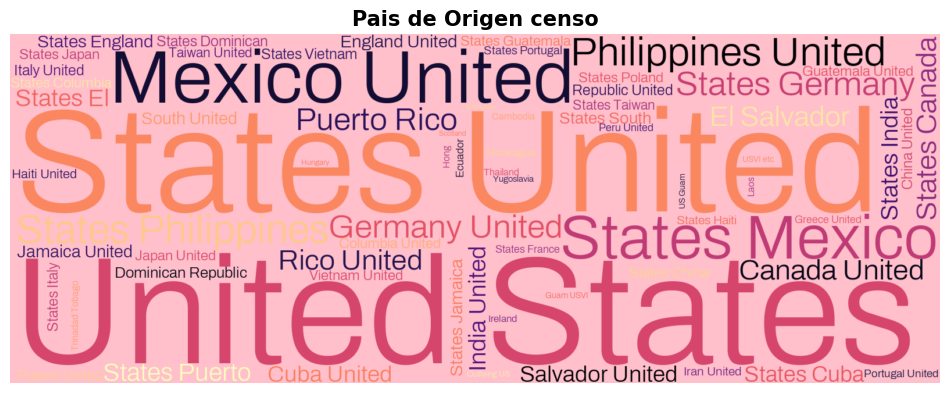

In [105]:
plt.figure(figsize=(12, 12))
wc = WordCloud(font_path= r"C:\Users\mareg\Downloads\Archivo-Light.ttf",
               max_words=100,
               min_font_size=10,
               height=600,
               width=1600,
               background_color='pink',
               contour_color='white',
               colormap='magma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(df.native_country))

plt.title("Pais de Origen censo", size=15, weight='bold')
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

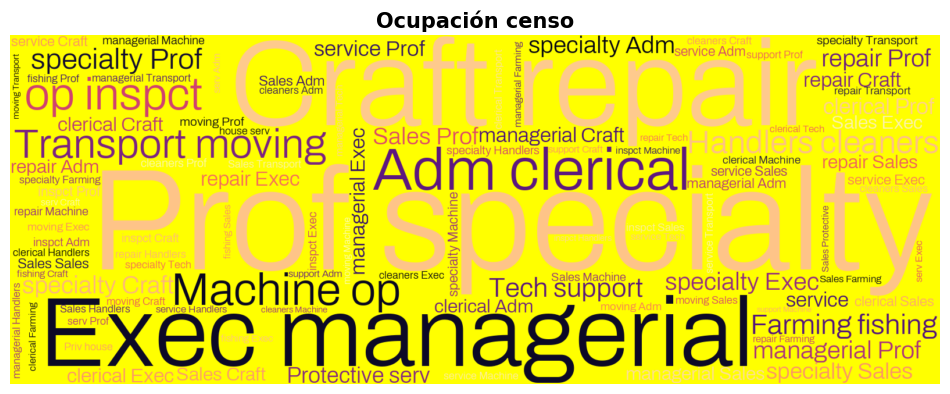

In [106]:
plt.figure(figsize=(12, 12))
wc = WordCloud(font_path= r"C:\Users\mareg\Downloads\Archivo-Light.ttf",
               max_words=1000,
               min_font_size=10,
               height=600,
               width=1600,
               background_color='yellow',
               contour_color='black',
               colormap='magma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(df.occupation))

plt.title("Ocupación censo", size=15, weight='bold')
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

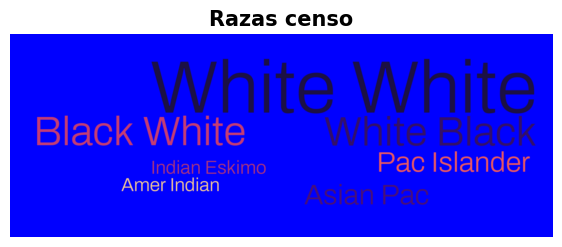

In [107]:
plt.figure(figsize=(7, 7))
wc = WordCloud(font_path= r"C:\Users\mareg\Downloads\Archivo-Light.ttf",
               max_words=1000,
               min_font_size=10,
               height=600,
               width=1600,
               background_color='blue',
               contour_color='black',
               colormap='magma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(df.race))

plt.title("Razas censo", size=15, weight='bold')
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

<Axes: xlabel='age', ylabel='Density'>

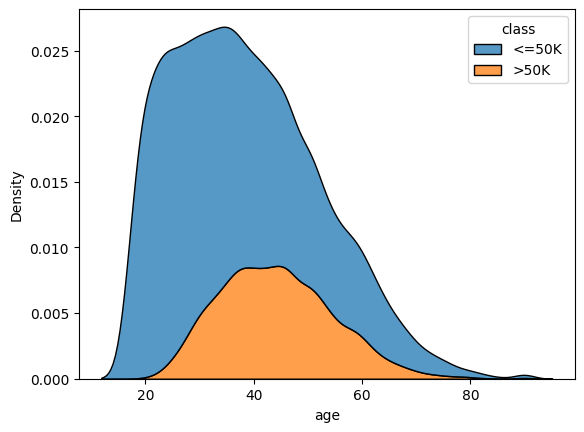

In [109]:
# Visualize Target Class (Ingresos)
columns = list(df.columns)
sns.kdeplot(data=df, x=columns.pop(0), hue="class", multiple="stack")

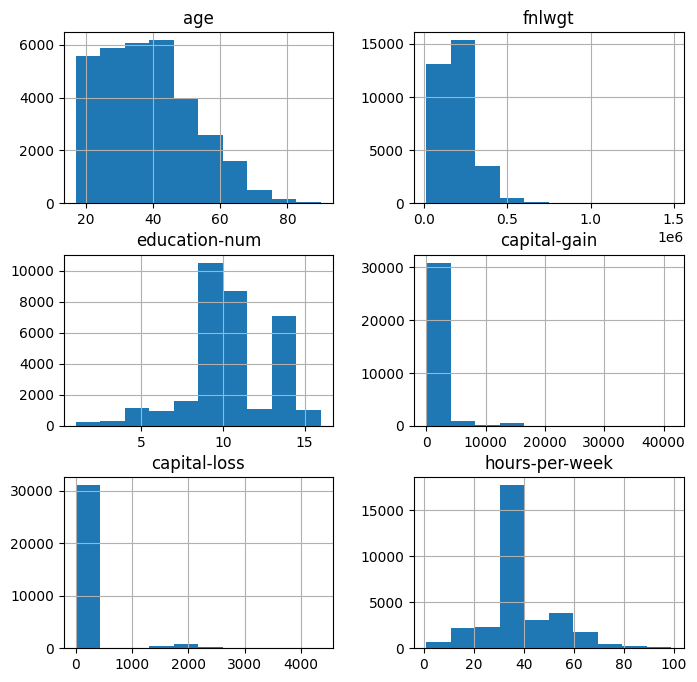

In [111]:

rcParams['figure.figsize'] = 8, 8

# Seleccionar y mostrar histogramas de las características numéricas
df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()

# Mostrar los histogramas en la pantalla
plt.show()

#df_numeric

In [ ]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(30,5))
for i,col in enumerate(numerical_columns):
    plt.subplot(1,len(numerical_columns),i+1)
    df[[col]].boxplot(fontsize=20)

In [ ]:
sns.countplot(y='occupation', hue='income', data=data,)

In [112]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native_country',
       'class'],
      dtype='object')

In [113]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


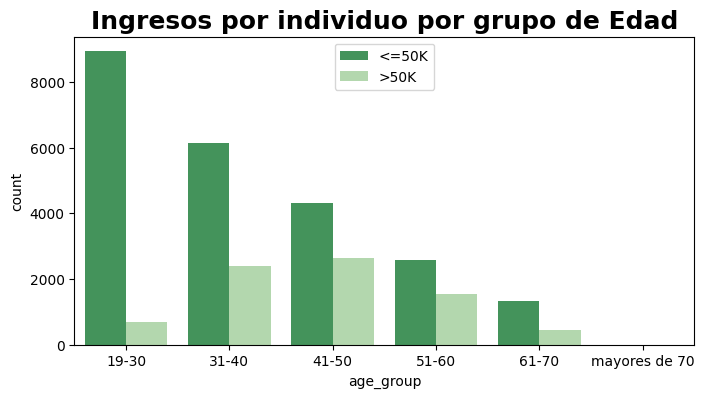

In [114]:
plt.figure(figsize=(8,4))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'mayores de 70']
sns.countplot(df['age_group'], hue = df['class'], palette='Greens_r', order = order_list)
plt.title('Ingresos por individuo por grupo de Edad', fontsize=18, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

Adm-Clear = Administrativos , Craft 5

ANÁLISIS BIVARIANTE

<Axes: xlabel='class', ylabel='count'>

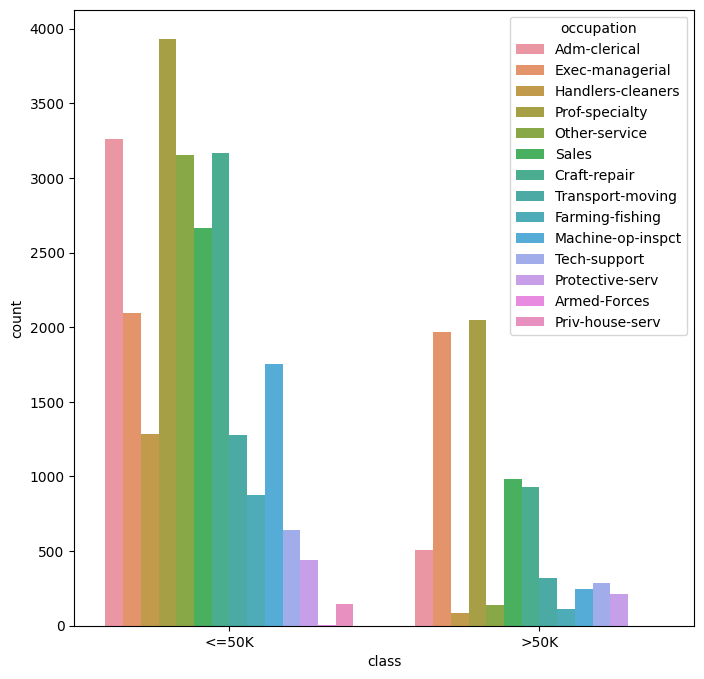

In [115]:
sns.countplot(x = 'class', hue = 'occupation', data = df)

In [116]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


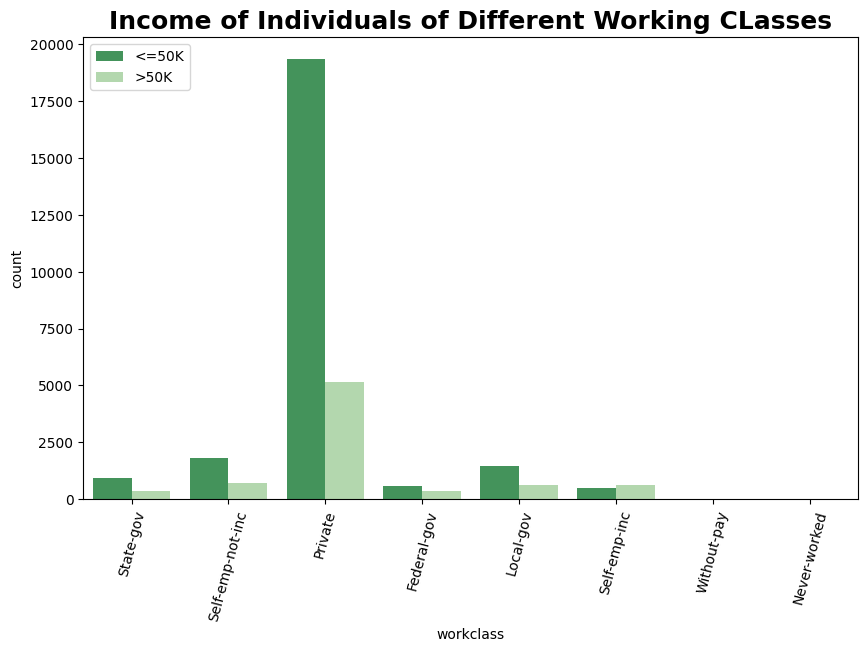

In [117]:
plt.figure(figsize=(10,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['workclass'], hue = df['class'], palette='Greens_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=10,rotation = 75)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


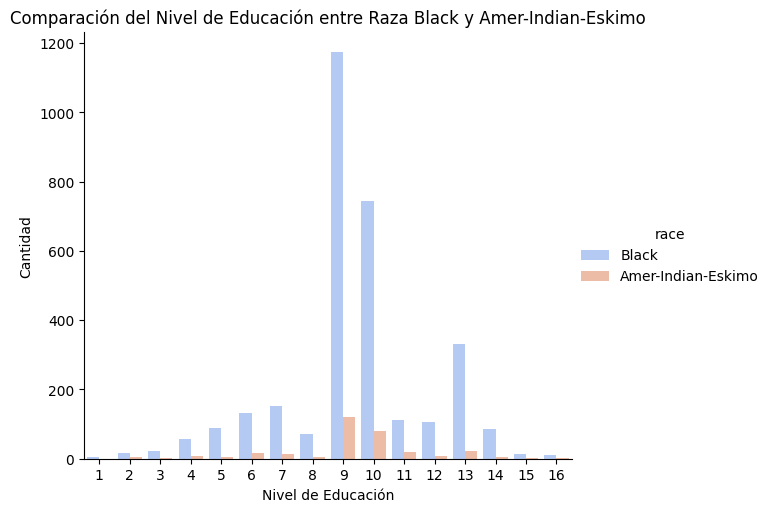

In [119]:

# Filtrar los datos para incluir solo raza Black y Amer-Indian-Eskimo
df_filtered = df[df['race'].isin(['Black', 'Amer-Indian-Eskimo'])]

# Crear el gráfico utilizando Seaborn
sns.catplot(data=df_filtered, x='education-num', hue='race', kind='count', palette='coolwarm', height=5, aspect=1.2)

# Configurar los ejes y etiquetas
plt.title("Comparación del Nivel de Educación entre Raza Black y Amer-Indian-Eskimo")
plt.xlabel("Nivel de Educación")
plt.ylabel("Cantidad")

# Mostrar la gráfica
plt.show()

Hacer otro por mujeres , raza

In [120]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native_country',
       'class', 'age_group'],
      dtype='object')

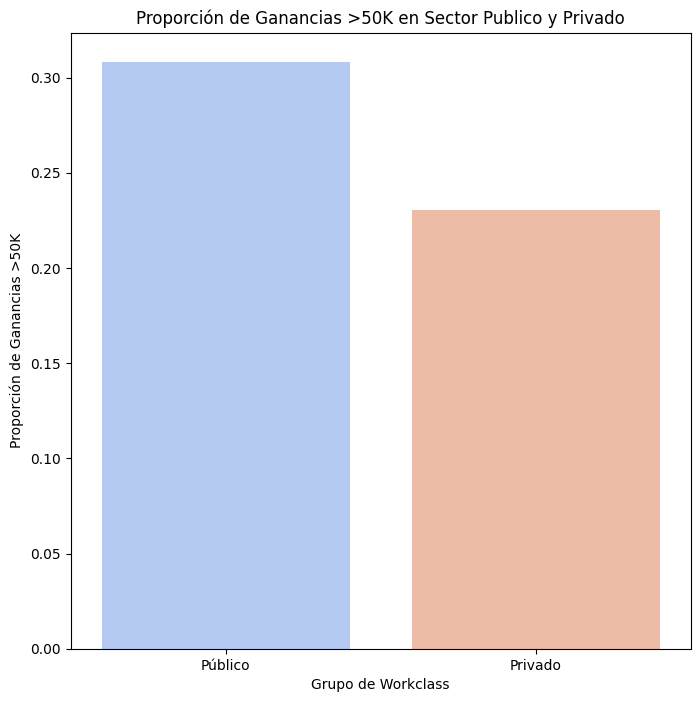

In [124]:
df['class_numeric'] = df['class'].map({'<=50K': 0, '>50K': 1})
# Definir dos grupos de workclass
group_1 = ['State-gov', 'Federal-gov', 'Local-gov']
group_2 = ['Self-emp-inc', 'Without-pay', 'Never-worked', 'Self-emp-not-inc', 'Private']

# Calcular la proporción de ganancias '>50K' para cada grupo de workclass
prop_ganancias_group1 = df[df['workclass'].isin(group_1)]['class_numeric'].mean()
prop_ganancias_group2 = df[df['workclass'].isin(group_2)]['class_numeric'].mean()

# Crear el gráfico utilizando Seaborn
sns.barplot(x=['Público', 'Privado'], y=[prop_ganancias_group1, prop_ganancias_group2], palette='coolwarm')

# Configurar los ejes y etiquetas
plt.title("Proporción de Ganancias >50K en Sector Publico y Privado")
plt.xlabel("Grupo de Workclass")
plt.ylabel("Proporción de Ganancias >50K")

# Mostrar la gráfica
plt.show()

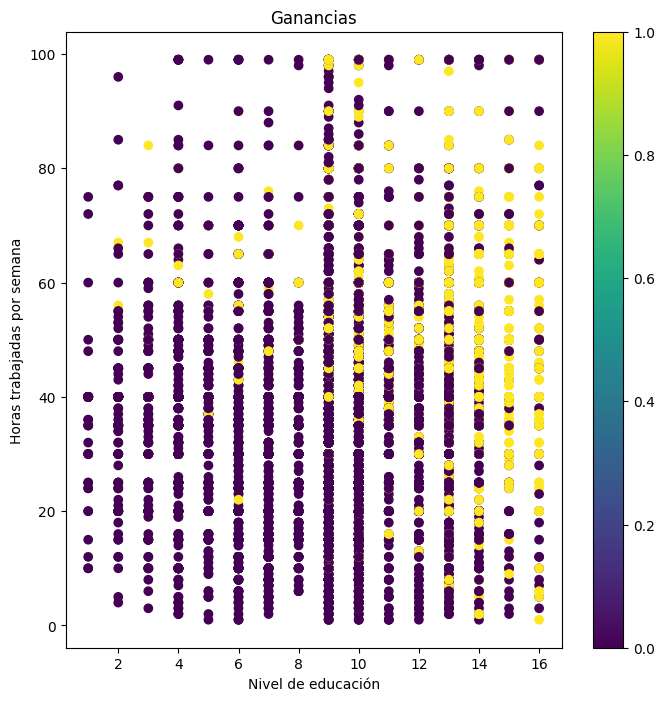

In [125]:
import matplotlib.pyplot as plt

# Mapear las categorías a valores numéricos
class_mapping = {'<=50K': 0, '>50K': 1}
df['class_numeric'] = df['class'].map(class_mapping)


# Crear la gráfica de dispersión
plt.scatter(df['education-num'], df['hours-per-week'], c=df['class_numeric'])
plt.colorbar()  # Agregar una barra de colores para la variable 'class_numeric'

# Configurar los ejes y etiquetas
plt.title("Ganancias")
plt.xlabel("Nivel de educación")
plt.ylabel("Horas trabajadas por semana")

# Mostrar la gráfica
plt.show()


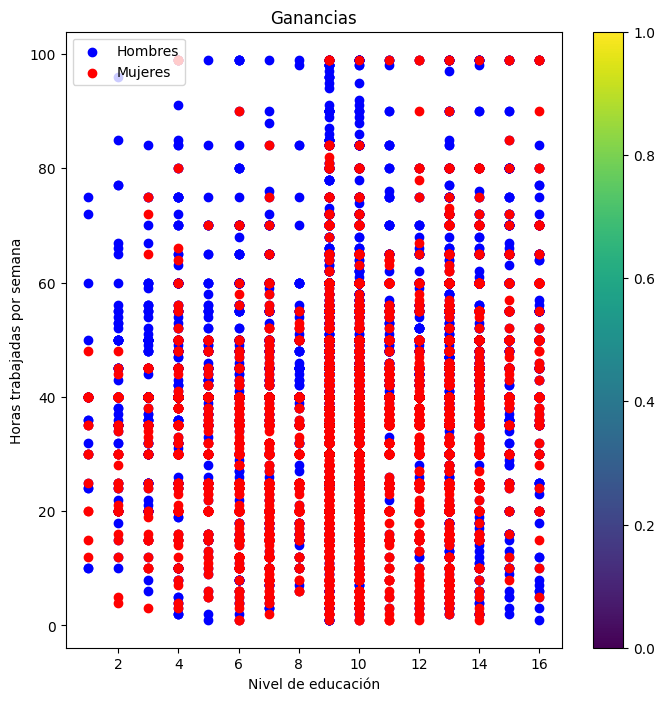

In [126]:

# Mapear las categorías a valores numéricos
class_mapping = {'<=50K': 0, '>50K': 1}
df['class_numeric'] = df['class'].map(class_mapping)

# Crear la gráfica de dispersión para hombres (sexo='male')
plt.scatter(df[df['sex'] == 'Male']['education-num'], df[df['sex'] == 'Male']['hours-per-week'], c='blue', label='Hombres')

# Crear la gráfica de dispersión para mujeres (sexo='female')
plt.scatter(df[df['sex'] == 'Female']['education-num'], df[df['sex'] == 'Female']['hours-per-week'], c='red', label='Mujeres')

plt.colorbar()  # Agregar una barra de colores para la variable 'class_numeric'

# Configurar los ejes y etiquetas
plt.title("Ganancias")
plt.xlabel("Nivel de educación")
plt.ylabel("Horas trabajadas por semana")
plt.legend()  # Agregar leyendas para diferenciar entre hombres y mujeres

# Mostrar la gráfica
plt.show()



In [37]:
import seaborn as sns

Pairplot de las variables numéricas

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


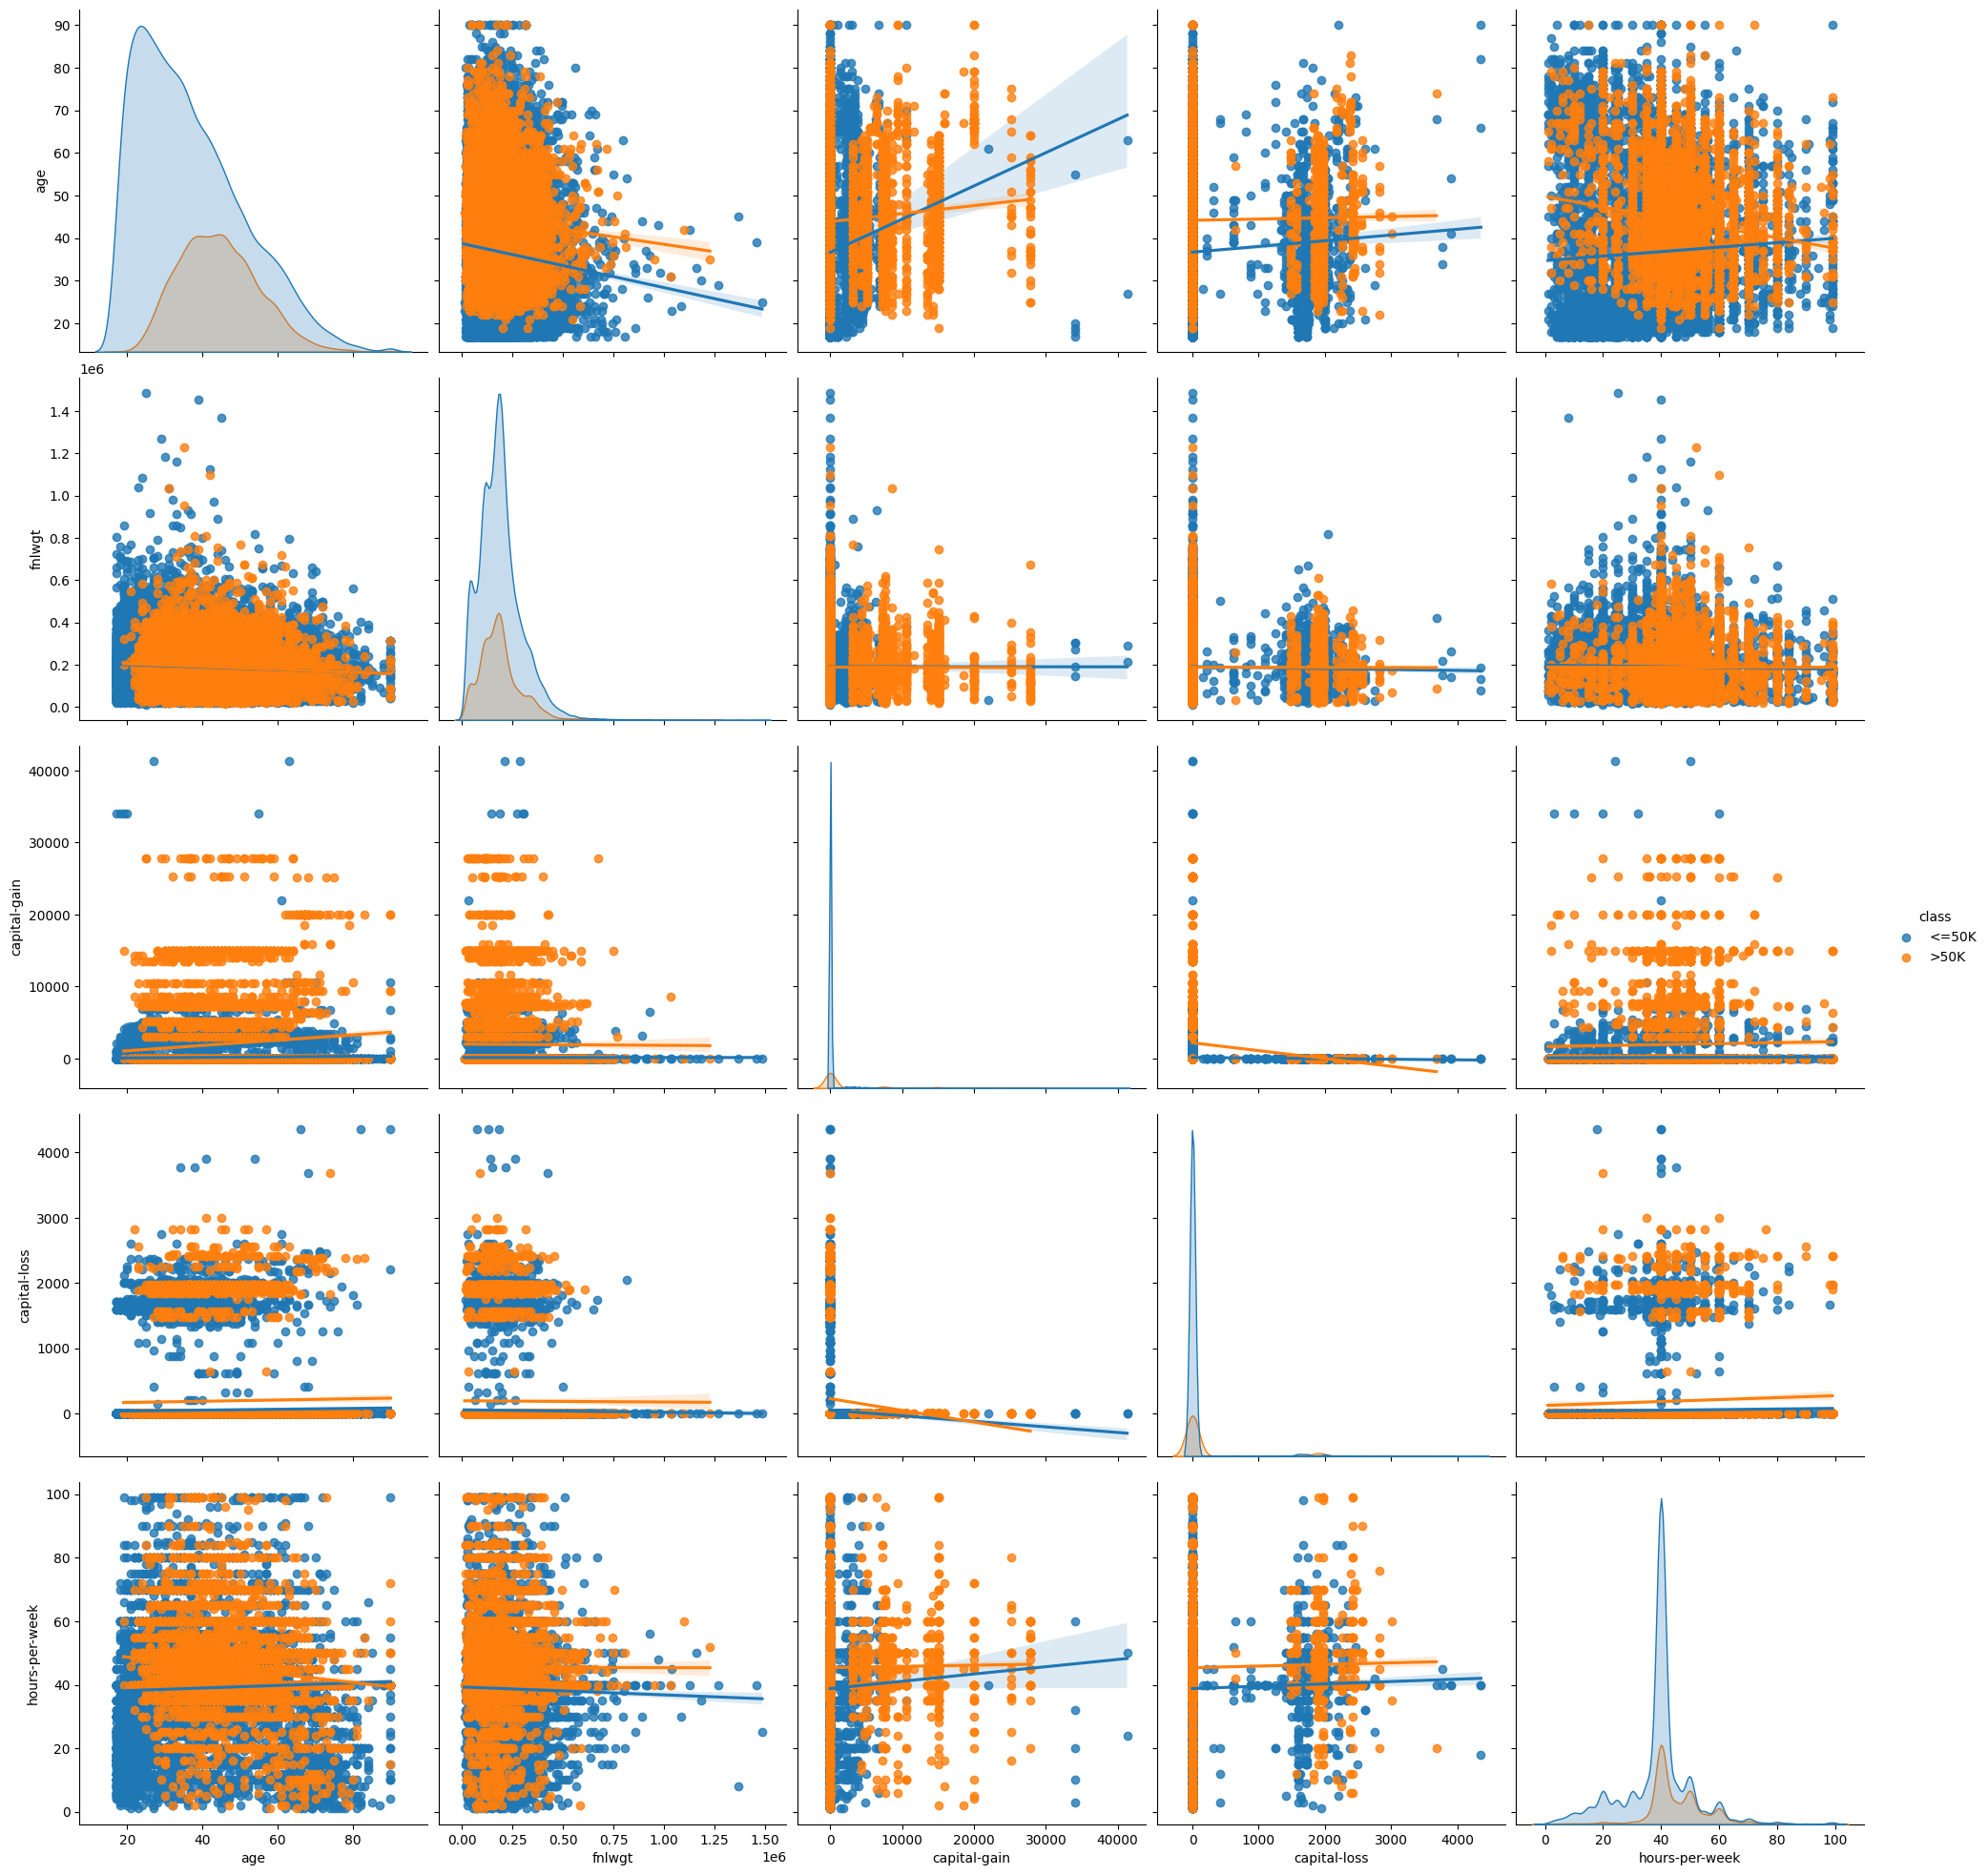

In [127]:
sns.pairplot(df.dropna(),
            hue='class',
            height=4,
            vars=["age", "fnlwgt","capital-gain", "capital-loss","hours-per-week"],
            kind='reg'); # "reg" de regresión lineal

In [128]:
df.corr()

C:\Users\mareg\AppData\Local\Temp\ipykernel_12784\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class_numeric
age,1.000000,-0.076447,0.036224,0.115583,0.057745,0.068515,0.234037
fnlwgt,-0.076447,1.000000,-0.043388,-0.004537,-0.010260,-0.018898,-0.009502
education-num,0.036224,-0.043388,1.000000,0.143718,0.079892,0.148422,0.335272
capital-gain,0.115583,-0.004537,0.143718,1.000000,-0.050027,0.081742,0.306272
capital-loss,0.057745,-0.010260,0.079892,-0.050027,1.000000,0.054229,0.150501
hours-per-week,0.068515,-0.018898,0.148422,0.081742,0.054229,1.000000,0.229658
class_numeric,0.234037,-0.009502,0.335272,0.306272,0.150501,0.229658,1.000000


Apenas existe correlación entre variables

C:\Users\mareg\AppData\Local\Temp\ipykernel_12784\891833841.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr(method='pearson')


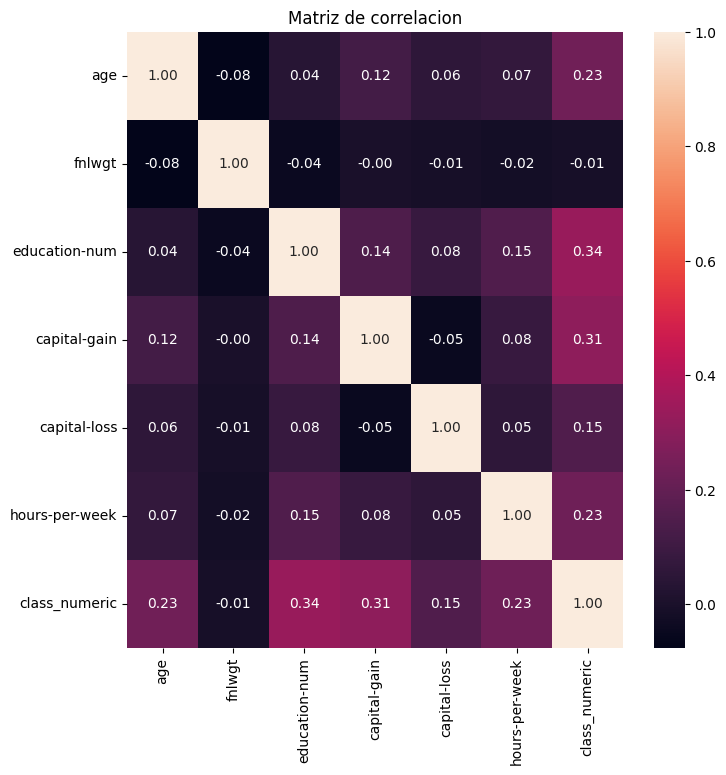

In [129]:
correlations = df.corr(method='pearson')
fig = plt.figure(figsize=(8, 8))
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.title('Matriz de correlacion')
plt.show()


In [130]:
import plotly.graph_objects as go
import pandas as pd

# Aquí asume que ya tienes los datos en un DataFrame 'data'
# Si no tienes los datos, puedes cargarlos desde tu fuente de datos correspondiente

fig = go.Figure(go.Parcats(
    dimensions=[
        {'label': 'Workclass', 'values': df['workclass']},
        {'label': 'Education', 'values': df['education']},
        {'label': 'Race', 'values': df['race']},
        # Agrega más dimensiones según los datos que deseas visualizar
    ],
    line={'colorscale': 'Viridis'},
    hoveron='color',
    hoverinfo='probability+value'
))

fig.update_layout(
    title="How different factors such as Workclass, Education, Race etc. define the income bracket",
    title_x=0.5,
    xaxis_title="",
    yaxis_title="Probability",
    font=dict(size=14),
    showlegend=False
)

fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'hoverinfo' property of parcats
        Received value: 'probability+value'

    The 'hoverinfo' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['count', 'probability'] joined with '+' characters
        (e.g. 'count+probability')
        OR exactly one of ['all', 'none', 'skip'] (e.g. 'skip')

Estadística:
Si hicieramos un contraste para las variables, para ver si t es significativo o no, el coeficiente de correlacion entre variable respuesta y contraste debe ser mayor en valor absoluto a 2&#8730;n con n tamaño muestral (aqui 32561) . Por ello el contrate de hipótesis rechazará cualquier variable si es suficientemente grande en Big data .
 

<a href='ML_Baseline.ipynb'>Ver siguiente notebook</a>

In [36]:
df.to_csv('adults_cleaned.csv', index=False)

In [37]:
adults_cleaned = pd.read_csv('adults_cleaned.csv')
adults_cleaned.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [39]:
adults_cleaned.shape

(32537, 15)

Limpieza de Datos 

In [327]:

# Eliminar la columna "education-num" del DataFrame "adults_cleaned"
#adults_cleaned.drop("education-num", axis=1, inplace=True)

# Ver los primeros registros del DataFrame actualizado
adults_cleaned.head(3)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,class
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [328]:
adults_cleaned.shape

(32537, 14)

In [329]:

# Función para clasificar la educación en "Educación Primaria", "Educación Secundaria" y mantener "Educación Superior"
def clasificar_educacion(educacion):
    educacion_primaria = ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th"]
    educacion_secundaria = ["10th", "11th", "12th", "HS-grad"]

    if educacion in educacion_primaria:
        return "Educación Primaria"
    elif educacion in educacion_secundaria:
        return "Educación Secundaria"
    else:
        return educacion

adults_cleaned['education_new'] = adults_cleaned['education'].apply(clasificar_educacion)

adults_cleaned.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,class,education_new
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Bachelors
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Educación Secundaria
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Educación Secundaria
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors


In [330]:
adults_cleaned.education_new.nunique()

9

In [331]:
adults_cleaned.drop("education", axis=1, inplace=True)


### 
Reemplazamos cada valor  con un número entero distinto. Los usaremos con variables ordinales como "education".

In [333]:

# Lista de columnas categóricas para aplicar One-Hot Encoding
categorical_columns = ['age', 'workclass', 'education_new', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

# Aplicar One-Hot Encoding a las columnas categóricas
dummies = pd.get_dummies(adults_cleaned[categorical_columns], drop_first=True)

# Concatenar las variables binarias con el DataFrame original
df_encoded = pd.concat([adults_cleaned.drop(columns=categorical_columns), dummies], axis=1)

df_encoded.head()

,fnlwgt,capital-gain,capital-loss,hours-per-week,class,age,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,77516,2174,0,40,<=50K,39,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,83311,0,0,13,<=50K,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,215646,0,0,40,<=50K,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,234721,0,0,40,<=50K,53,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,338409,0,0,40,<=50K,28,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [334]:
df_encoded.dtypes

fnlwgt                             int64
capital-gain                       int64
capital-loss                       int64
hours-per-week                     int64
class                             object
                                   ...  
native_country_Thailand            uint8
native_country_Trinadad&Tobago     uint8
native_country_United-States       uint8
native_country_Vietnam             uint8
native_country_Yugoslavia          uint8
Length: 90, dtype: object

No lo uso porque es cualitativo  orden de la variables en "education".

In [ ]:
# Creamos el codificador indicandole el orden de la variables
#encoder = OrdinalEncoder(categories=[[" Preschool", " 1st-4th", " 5th-6th", 
                                      #" 7th-8th", " 9th", " 10th", " 11th", 
                                      #" 12th", " HS-grad", " Some-college", 
                                      #" Assoc-voc", " Assoc-acdm", 
                                      #" Bachelors", " Masters", 
                                      #" Prof-school", " Doctorate"]])

# Ajustamos el codificador con la variable education y la transformamos
#encoder.fit(df[["education"]])
#df["education-encoded"] = encoder.transform(df[["education"]])

In [335]:
df_encoded.to_csv('adults_cleaned_encoded.csv', index=False)